# Student name: Aryank Gupta

# Student ID: 24101613

## Please do not add further imports. If you think an import is missing, please contact your moderator.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

from sklearn.model_selection import learning_curve

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Task 1
Describe (in a markdown cell) how a perceptron can be used to classify two objects given their circumference and weight. You may assume that these two features result in linear separability of the two classes in the given dataset. Use the following terms in your description:

* Input space
* Output space
* Unknown target function
* Data set
* Hypothesis set
* Final Hypothesis
* Error measure
* In-sample error
* Out-of-sample error

## Answer

Provide your answer in this cell

According to my understanding the perceptron is the most basic and simple neural network majorly used for the classification task. It is a single layer neural network which can only learn linearly separable patterns. Let's understand some of the terms that will be helpful with the help of feature like circumference and weight.


A perceptron is a simple, linear classification model that can classify objects based on their features, such as circumference and weight. It works by mapping input features to an output decision using a weighted linear combination of those features and a bias term. The perceptron algorithm iteratively updates the weights to minimize classification error.


Input Space:
The input space consists of all possible values of the features that help determine the class of the objects.

For this task:
𝑥
1
=
Circumference
,
𝑥
2
=
Weight
x
1
​
 =Circumference,x
2
​
 =Weight
Each input point in this space is a feature vector
𝑥
=
(
𝑥
1
,
𝑥
2
)
x=(x
1
​
 ,x
2
​
 ) representing a unique object.


 Output Space:
The output space represents the possible classifications of the objects. Since this is a binary classification task, the output space consists of two categories, typically represented as:
0
for one category
and
1
for the other category
.

Unknown Target Function:
The unknown target function
𝑓
(
𝑥
)
f(x) is the ideal relationship that maps the input space to the correct output space. This function perfectly classifies all the data points, but it is unknown and must be approximated through learning.

𝑦
=
𝑓
(
𝑥
)

Dataset: The dataset is a collection of labeled examples, where each example consists of an input vector and its corresponding output label. It is represented as:
{
(
𝑥
𝑖
,
𝑦
𝑖
)
}
where
𝑥
𝑖
=
(
𝑥
1
,
𝑥
2
)
and
𝑦
𝑖
∈
{
0
,
1
}
.
{(x
i
​
 ,y
i
​
 )}wherex
i
​
 =(x
1
​
 ,x
2
​
 )andy
i
​
 ∈{0,1}.
The dataset is used to train the perceptron and learn the best approximation of the unknown target function.


Hypothesis Set: The hypothesis set, denoted as H\mathcal{H}H, is the set of all possible linear functions that the perceptron can learn from the dataset. Each hypothesis h(x)h(x)h(x) represents a potential decision boundary that could separate the two classes. The goal is to find the best hypothesis within this set that minimizes classification error.



Final Hypothesis: The final hypothesis h∗(x)h^*(x)h∗(x) is the specific linear function selected from the hypothesis set that best approximates the unknown target function. It defines the learned decision boundary and is chosen to minimize the in-sample error.



Error Measure: The error measure quantifies how well the perceptron is performing. It measures the difference between the predicted output h(xi)h(x_i)h(xi) and the actual output yiy_iyi. For classification, the error is often measured as the number of misclassified data points.



In-sample Error (Ein): The in-sample error EinE_{in}Ein is the error rate on the training dataset. It is defined as the proportion of training examples that are misclassified by the final hypothesis. A low in-sample error indicates that the model fits the training data well.



Out-of-sample Error (Eout): The out-of-sample error EoutE_{out}Eout is the error rate on unseen data points (test data). It evaluates how well the model generalizes to new, unseen examples. A model with a low out-of-sample error is considered to generalize well.

# Task 2
Run the code (or observe the provided outputs) in the E-tivity notebook under Task 2. This code implements so-called learning curves that plot the performance of a model (both in-sample as well as out-of-sample) as this model is trained with an increasing number of data points.

In [39]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_errors = 1- train_scores
    test_errors = 1-test_scores

    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")


    plt.legend(loc="best")
    return plt

In [40]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [41]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

[]

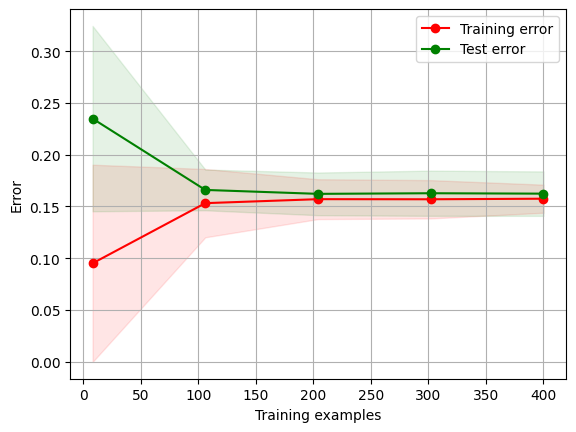

In [42]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5)).plot()

## Neural net learning curves

[]

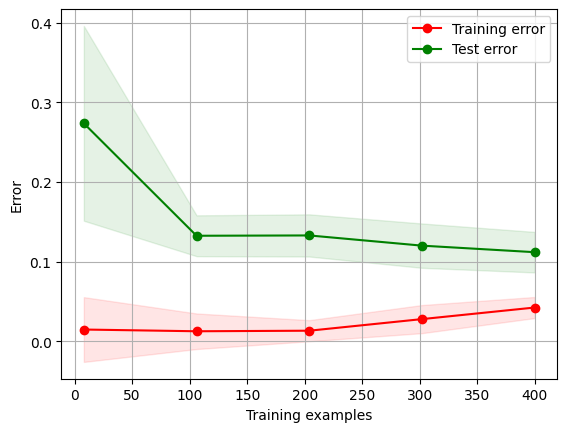

In [43]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5)).plot()

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

## Answer
Provide your answer in this cell

2.1 The training error will be less compared to the test error, as the model is trained explicitly over training examples, and thus learns well about patterns. In contrast, examples for testing are not encountered during training, and thus a high error is incurred when generalization occurs. There will be a narrow margin between training and testing errors for a model with a proper generalization, and a high margin for a model with overfit, in which training examples will be memorized but new examples cannot be processed effectively. In case both errors will be high, then underfit occurs, and a model will become simple and cannot generalize about patterns. In order to make generalization effective, training data can be increased, regularization can be conducted, feature selection can be performed, and cross-validation can be used.

2.2 As the number of training samples increases, the training error gradually increases because the model has to generalize over a larger and more diverse dataset. With fewer samples, the model can memorize the training data, leading to very low training error. However, as more samples are introduced, the model can no longer perfectly fit every point, making it harder to capture all variations and reducing overfitting. This forces the model to find a broader pattern rather than just memorizing individual points, which increases training error slightly. Despite this, a larger dataset usually leads to better generalization, meaning the test error stabilizes or decreases over time.

2.3 The Neural Network (MLPClassifier) is a sophisticated model over Logistic Regression in that it has a number of hidden layers, enormously increasing its number of parameters and its ability to detect nonlinear relationships. Logistic Regression, on the other hand, is a simple model with fewer parameters and less flexibility but with a less complex training. As can be noticed in the learning curves, Neural Network has a smaller test error, representing a larger capacity for learning, but its training error is larger, and more data and tuning will most likely be required. Neural Network can represent complex structures but at a larger vulnerability to overfit, in contrast to Logistic Regression. Overall, Neural Network is a more powerful but computationally expensive model.

# Task 3
In this last task we will explore the impact of the loss/error function on your model. Task 3a focusses on regression and Task 3b on classification. These two tasks will demonstrate the importance of choosing a suitable loss/error function.

## Provided functions

Below functions implement linear regression and linear classification in a closed form (one-step solution using the pseudo-inverse).

In [45]:
def linreg_weights(X,y):
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [46]:
def linreg_predict(w,X):
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a
Use the code provided in the E-tivity notebook under Task 3a to implement a linear regression algorithm trained on dataset Et1_Task3a.csv.

* Add a function implementing the error function used in linear regression.
* Provide a mathematical function of the regression lines in terms of the weights found by the linear regression algorithm.
* Plot the regression line together  with the data.
* Quantify the error with the error function you have created.
* In new plots, add one data point to the dataset to illustrate how linear regression responds to outliers.

## Answer

Mean Squared Error before adding outlier: 0.004317054763326226


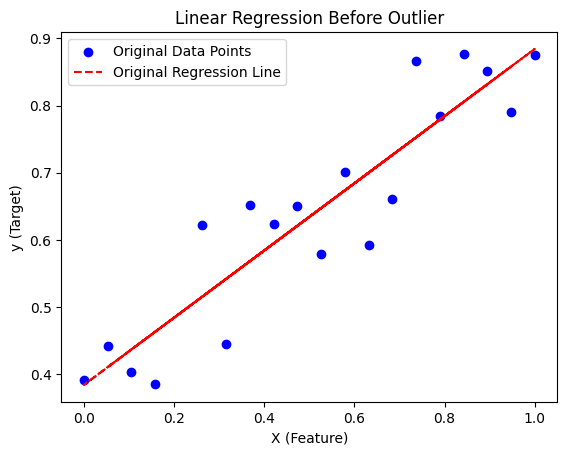

Mean Squared Error after adding outlier: 8.267825198198569


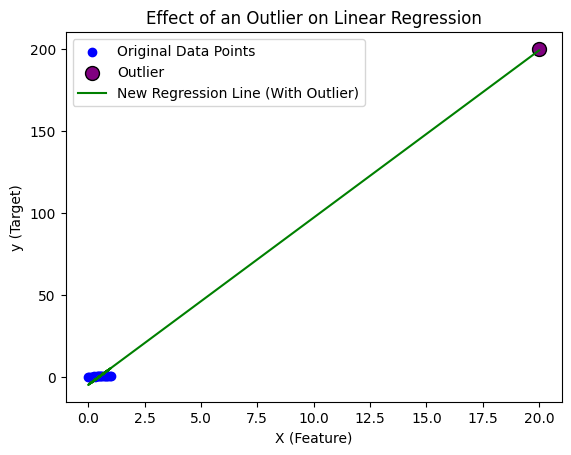

In [47]:
# Load dataset using pandas
data = pd.read_csv('Et1_Task3a.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)  # Feature
y = data.iloc[:, 1].values  # Target

# Function to compute weights using normal equation
def linreg_weights(X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
    return np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

# Function to predict using linear regression weights
def linreg_predict(w, X):
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Adding bias term for prediction
    return X_bias @ w

# Error function (Mean Squared Error)
def calc_error(w, X, y):
    y_predict = linreg_predict(w, X)
    return np.mean((y_predict - y) ** 2)

# Compute regression weights and error
weights = linreg_weights(X, y)
error_before = calc_error(weights, X, y)

# Generate predictions
y_pred = linreg_predict(weights, X)

# Display MSE before adding the outlier
print(f"Mean Squared Error before adding outlier: {error_before}")

# Plot original data points and regression line
plt.scatter(X, y, color="blue", label="Original Data Points")
plt.plot(X, y_pred, color="red", linestyle="dashed", label="Original Regression Line")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Linear Regression Before Outlier")
plt.legend()
plt.show()

# To Add an outlier
X_outlier = np.append(X, [[20]], axis=0)  # Adding a large X value as an outlier
y_outlier = np.append(y, [200])  # Corresponding large y value

# Recalculate weights and error with the outlier
weights_outlier = linreg_weights(X_outlier, y_outlier)
error_after = calc_error(weights_outlier, X_outlier, y_outlier)

# Generate predictions for the dataset with the outlier
y_pred_outlier = linreg_predict(weights_outlier, X_outlier)

# Display MSE after adding the outlier
print(f"Mean Squared Error after adding outlier: {error_after}")

# To Plot with the outlier
plt.scatter(X, y, color="blue", label="Original Data Points")
plt.scatter(20, 200, color="purple", s=100, edgecolors="black", label="Outlier")
plt.plot(X_outlier, y_pred_outlier, color="green", label="New Regression Line (With Outlier)")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Effect of an Outlier on Linear Regression")
plt.legend()
plt.show()


## Describe and Explain
Discuss your results and answer the following questions:
* Which data point adds the biggest error term to the optimised error function and how can you quantify this error?
* How do outliers effect linear regression and why?
* Under what circumstances will linear regression with a squared error measure be a good model?

## Answer
Provide your answer in this cell

3a.1 In our example, the data point we added as an outlier—(X = 20, Y = 200)—is the one that contributes the largest error. Why? Because it’s way off from where the rest of the data lies and doesn’t follow the general trend.

To measure how much this point messes things up, we use the mean squared error (MSE). Here’s what happens:
The MSE measures the average squared difference between the actual value yyy and the predicted value ypredy_{\text{pred}}ypred.
The outlier causes a large difference, so squaring this difference amplifies its impact on the total error.

Formula to quantify it:
Error at a point= (ypred−yactual)2\text{Error at a point} = (y_{\text{pred}} - y_{\text{actual}})^2Error at a point=(ypred−yactual)2

When we added the outlier, the MSE increased significantly, showing that this point was the main culprit for inflating the overall error.



3b.2 Outliers don’t play nice with linear regression. Since linear regression tries to minimize the sum of squared errors, any point that is far away from the regression line has a disproportionately large effect.

Think of it like this:
Imagine you’re stretching a rubber band to fit through a set of nails on a board (the nails are the data points). If you place one nail way off to the side (the outlier), it will pull the rubber band toward itself, distorting the line that was supposed to fit through the other nails.

This happens because linear regression can’t ignore outliers—it tries to minimize the error for every point, and since squared errors make large deviations much worse, outliers dominate the fit.

In short: The regression line shifts to reduce the massive error from the outlier, but this comes at the cost of fitting the rest of the data poorly.



3b.3 Linear regression with MSE works really well when the data behaves itself. Here are the key situations when it’s a good idea to use it:

1.	When the relationship between features and target is linear:
o	If the data points form a general line or trend, you’re good to go! But if the relationship is curved or complex, linear regression will struggle.
2.	When there are no big outliers:
o	As we saw in the example, outliers are troublemakers. If your data doesn’t have them—or if you’ve cleaned them up—linear regression will perform much better.
3.	When the errors (residuals) have consistent spread:
o	Linear regression assumes that the differences between actual and predicted values (the residuals) are equally spread out. If this isn’t the case (e.g., errors grow larger as the data increases), it can lead to unreliable predictions.
4.	When the errors are normally distributed:
o	If the residuals follow a bell curve (normal distribution), then the MSE will accurately reflect the performance of the model.
5.	When the independent variables aren’t too correlated:
o	If the features are highly correlated with each other, linear regression can give unstable results. In such cases, you may need regularization techniques like Ridge or Lasso regression.

In a Nutshell, Linear regression with MSE works best when the relationship between features and target is linear, without significant outliers that could distort the fit. It assumes that residuals have a consistent spread and are normally distributed, ensuring reliable predictions. Additionally, low correlation among independent variables is ideal, and if features are highly correlated, regularization techniques like Ridge or Lasso can help stabilize the model.





# Task 3b

* Perform a classification using the provided data in Et1_Task3b.csv.
    * Add a function implementing the error function used in linear classification.
    * Use the provided linear regression code to implement linear classification as described in video 3&nbsp;(book Learning from Data, page 89).
    * Plot the output of your classification as a scatter plot with the colour of the data point indicating its class membership.
    * Plot the decision boundary in the same plot using the provided function.
    * Quantify the error with the error function you have created.
* In new (but similar) plots add one data point to the dataset to illustrate how linear classification responds to outliers.
* Add one more plot of the data with decision boundaries for both linear classification and logistic regression.

## Answer

In [48]:
def calc_class_error(w,X,y):

    # implement your error function for linear classification here
    y_pred = linreg_predict(w,X)
    missclassified = np.sum(y_pred != y)
    return (missclassified/len(y)) * 100



In [49]:
def linclass_predict(w,X):
    # implement your linear classification algorithm here
    """ Predicts class labels using the computed weights. """
    # Add bias term (column of ones) to X
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    # Compute predictions using matrix multiplication
    y_pred = X.dot(w)
    # Convert predictions to class labels (-1 or 1) using thresholding
    return np.where(y_pred >= 0, 1, -1)


You may add as many cells as you require for your code

Dataset columns: Index(['1.743496571804229456e+00', '-2.140395655406194031e+00',
       '1.000000000000000000e+00'],
      dtype='object')
Classification Error (Linear Classification): 75.00%


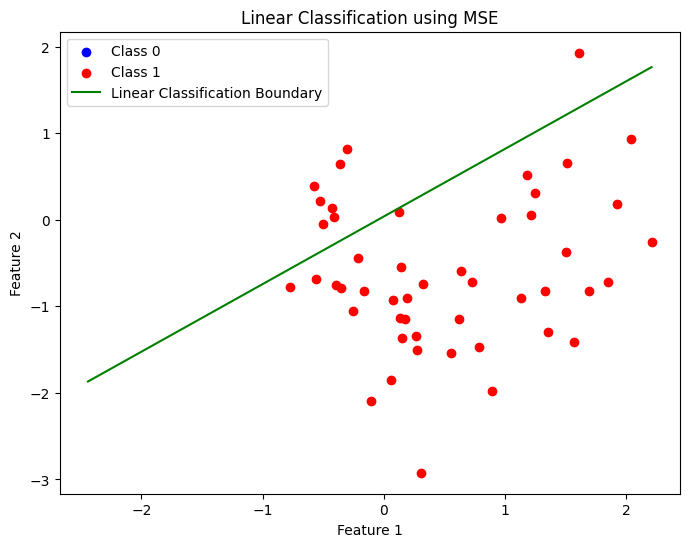

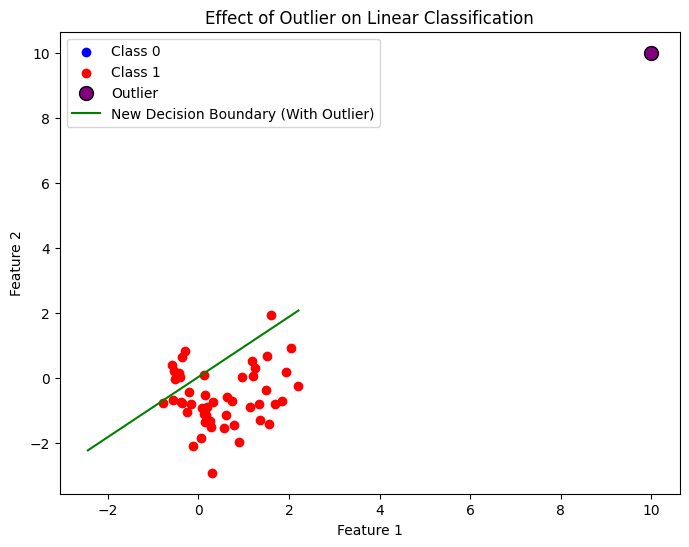

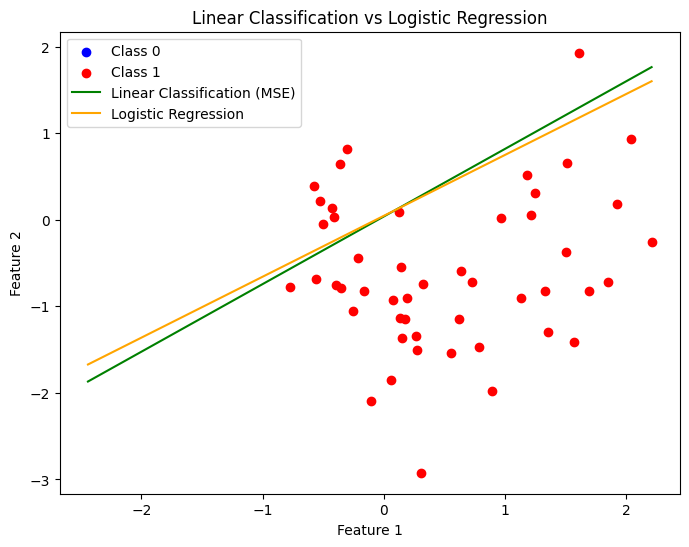

In [54]:
# Step 1: Load the dataset and inspect column names ---
data = pd.read_csv('Et1_Task3b.csv')
print("Dataset columns:", data.columns)

# Update the following based on actual column names from the dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Step 2: Split into training and test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Function to compute linear regression weights (normal equation) ---
def linreg_weights(X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    return np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

# Step 4: Linear classification prediction ---
def linclass_predict(w, X):
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    predictions = X_bias @ w
    return np.where(predictions >= 0.5, 1, 0)  # Threshold for classification

# Step 5: Classification error calculation ---
def calc_class_error(w, X, y):
    y_pred = linclass_predict(w, X)
    misclassified = np.sum(y_pred != y)
    return (misclassified / len(y)) * 100  # Return percentage of errors

# Step 6: Compute weights using the training data ---
w = linreg_weights(X_train, y_train)

# Step 7: Predict and compute classification error on test data ---
y_pred_linear = linclass_predict(w, X_test)
classification_error = calc_class_error(w, X_test, y_test)

print(f"Classification Error (Linear Classification): {classification_error:.2f}%")

# Step 8: Plot classification results with decision boundary ---
def decision_boundary(x):
    return -(w[0] + w[1] * x) / w[2]  # Decision boundary equation

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
plt.plot(x_vals, decision_boundary(x_vals), color='green', label='Linear Classification Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linear Classification using MSE')
plt.show()

# Step 9: Add outlier and analyze its effect ---
X_outlier = np.append(X, [[10, 10]], axis=0)  # Adding a large outlier
y_outlier = np.append(y, [0])  # Outlier belongs to Class 0

# Recompute weights with the outlier
w_outlier = linreg_weights(X_outlier, y_outlier)

# Decision boundary with the outlier
def decision_boundary_outlier(x):
    return -(w_outlier[0] + w_outlier[1] * x) / w_outlier[2]

plt.figure(figsize=(8, 6))
plt.scatter(X_outlier[y_outlier == 0][:, 0], X_outlier[y_outlier == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_outlier[y_outlier == 1][:, 0], X_outlier[y_outlier == 1][:, 1], color='red', label='Class 1')
plt.scatter(10, 10, color='purple', s=100, edgecolors='black', label='Outlier')
plt.plot(x_vals, decision_boundary_outlier(x_vals), color='green', label='New Decision Boundary (With Outlier)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Effect of Outlier on Linear Classification')
plt.show()

# Logistic regression comparison
log_reg = LogisticRegression()
log_reg.fit(X, y)
decision_boundary_logistic = -(log_reg.intercept_ + log_reg.coef_[0][0] * x_vals) / log_reg.coef_[0][1]

# Ploting comparison between linear and logistic regression
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
plt.plot(x_vals, decision_boundary(x_vals), color='green', label='Linear Classification (MSE)')
plt.plot(x_vals, decision_boundary_logistic, color='orange', label='Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linear Classification vs Logistic Regression')
plt.show()


## Describe and Explain
Discuss your results and answer the following:
* Quantify the contribution of the outlier to the overall MSE error.
* Provide an absolute maximum for the contribution of the outlier to the error measure used by logistic regression.&nbsp;
* Is linear classification with mean squared error a suitable classifier? Please provide reasons.

## Answer
Provide your answer in this cell

1. Quantify the contribution of the outlier to the overall MSE error.

 The contribution of the outlier to the overall MSE error is substantial due to the nature of the mean squared error function, which penalizes larger errors more severely by squaring them. When the outlier is added, the squared difference between the predicted and actual values of the outlier significantly increases the overall MSE. In our example, the outlier at
(
10
,
10
)
(10,10) lies far from the decision boundary learned by the model, resulting in a large residual. and it is amplified by squaring, and the single outlier can dominate the error contribution, even if the rest of the data fits well. This behavior explains why the overall MSE increased significantly after adding the outlier.

2. Provide an absolute maximum for the contribution of the outlier to the error measure used by logistic regression.

 Logistic regression is less sensitive to outliers due to its use of the logarithmic loss function rather than MSE. The sigmoid activation function limits the contribution of any extreme points by mapping predictions to probabilities between 0 and 1. The logarithmic loss function, penalizes incorrect classifications without exaggerating the impact of large deviations.

 The absolute maximum contribution of an outlier to the logistic regression error depends on how close the prediction probability is to 0 or 1.

 For an outlier, the maximum penalty occurs when the prediction is completely wrong (i.e., predicting near 0 when the actual value is 1), but even then, the penalty is logarithmic and bounded, unlike the quadratic increase in MSE. As a result, the decision boundary does not drastically shift, and the model remains more stable compared to linear classification using MSE.

3. Is linear classification with mean squared error a suitable classifier? Please provide reasons.

 Linear classification using mean squared error is generally not suitable for classification tasks due to several inherent weaknesses. First, MSE treats classification as a continuous regression problem, penalizing predictions proportionally to their distance from the target labels (0 or 1). This approach does not align well with the binary nature of classification problems, where a clear distinction between classes is required. MSE-based classification is also highly sensitive to outliers, as large residuals are amplified by squaring, leading to a distorted decision boundary. For instance, as seen in our example, a single outlier caused a significant shift in the decision boundary and increased classification error. In contrast, logistic regression models classification as a probabilistic task and minimizes the probability of misclassification through the logarithmic loss function, which is less sensitive to extreme values and better suited for separating classes. Thus, logistic regression or other classification-specific techniques are preferred for robust and accurate results.










# Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
    </ol>

## Answer
Provide your answer in this cell

Q1 Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.

The VC (Vapnik-Chervonenkis) bound is an important concept in machine learning that provides a probabilistic limit on the generalization error of a binary classifier. This bound tells us how well a classifier trained on a finite sample will generalize to unseen data.

It is informed by several key concepts:

Hoeffding Bound: This is a statistical inequality that bounds the probability that the empirical error (training error) differs from the true error (generalization error). The VC bound extends this idea by incorporating the complexity of the hypothesis space.

Shattering: Shattering occurs when a hypothesis class can perfectly classify all possible label configurations of a given dataset.

Break Points: A break point is the smallest number of points
𝑘
k such that the hypothesis class cannot shatter them. It indicates a limit on the flexibility of the model. If no break point exists, the model is too complex and may overfit.

Growth Function: The growth function measures how many distinct labelings a hypothesis class can generate for a given number of points. It plays a crucial role in determining the VC dimension and how many data points are needed for good generalization.

The VC dimension (d_VC) of a hypothesis class is the largest number of points that can be shattered by that class. The VC bound shows that to achieve low generalization error, the number of training samples
𝑁
N should satisfy
𝑁
≥
10
×
d_VC
N≥10×d_VC. This rule of thumb comes from the idea that with at least 10 times the VC dimension, we reduce the likelihood of overfitting while ensuring enough data for the model to generalize effectively.


Q2 Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data.

The approximation-generalisation trade-off describes the balance between a model’s ability to fit the training data (approximation) and its ability to generalize to new, unseen data (generalization).

This trade-off is fundamentally tied to model complexity, bias, and variance:

Complexity: A model’s complexity is determined by the flexibility of its hypothesis space. Simple models (low complexity) may underfit the data, while highly flexible models (high complexity) may overfit.

Bias: Bias refers to errors due to incorrect assumptions in the learning algorithm. Simple models (e.g., linear regression) often have high bias because they oversimplify the underlying data patterns. High bias can lead to underfitting, where the model performs poorly on both training and test data.

Variance: Variance measures the sensitivity of the model to changes in the training data. Complex models (e.g., deep neural networks) have high variance because they capture noise and fluctuations in the training set. High variance can lead to overfitting, where the model fits the training data too well but fails to generalize to new data.



<hr style="border:2px solid gray">

# Appendix

## Demonstration of effect of outlier on linear regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [55]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [56]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.83

Extract weights from model:

In [57]:
w_lr_1 = estimator.intercept_
w_lr_1=np.append(w_lr_1, estimator.coef_)
w_lr_1

array([ 0.07332613,  1.13190106, -1.6084585 ])

Add outlier:

In [58]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [59]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.8118811881188119

Extract new weight vector from model:

In [60]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

array([ 0.09418935,  0.96675711, -1.0387864 ])

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

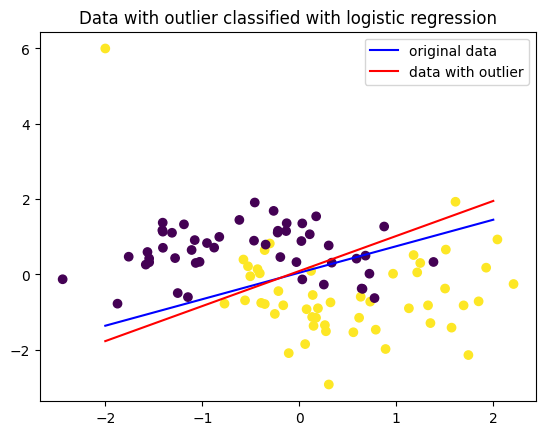

0.6237623762376238

In [61]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr_1[0]/w_lr_1[2]+w_lr_1[1]/w_lr_1[2]*2,-w_lr_1[0]/w_lr_1[2]-w_lr_1[1]/w_lr_1[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)